# Custiomer Lifetime Value(CLV)

## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Leer Dataset

In [2]:
df = pd.read_csv('OnlineRetail.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Data Prep

#### Convertir el compo de fecha

In [7]:
# Chante to date datime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
df['date']= df['InvoiceDate'].dt.date
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
date           datetime64[ns]
dtype: object

#### Filtar los valores nulos or Nan values

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
date                0
dtype: int64

In [12]:
df_not_missing =df[df['CustomerID'].notnull()]
df_not_missing.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [13]:
df_not_missing.shape

(406829, 9)

In [14]:
df_not_missing.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
date           0
dtype: int64

#### Filtar los valores negativos

In [15]:
len(df_not_missing[df_not_missing['Quantity']<0])

8905

In [16]:
df_positive_val = df_not_missing[df_not_missing['Quantity']>0]
df_positive_val.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


#### agregar  una nueva columna = total sales

In [19]:
df_positive_val['total_sales'] = df_positive_val['Quantity'] * df_positive_val['UnitPrice']
df_positive_val.head()

<ipython-input-19-dc442635bbf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive_val['total_sales'] = df_positive_val['Quantity'] * df_positive_val['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


### Feature Selections

In [20]:
df_positive_val.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'date', 'total_sales'],
      dtype='object')

In [21]:
cols = ['CustomerID', 'date', 'total_sales']
tx_data = df_positive_val[cols]
tx_data.head()

,CustomerID,date,total_sales
0,17850.0,2010-12-01,15.30
1,17850.0,2010-12-01,20.34
2,17850.0,2010-12-01,22.00
3,17850.0,2010-12-01,20.34
4,17850.0,2010-12-01,20.34


In [22]:
tx_data.shape

(397924, 3)

#### EDA

In [23]:
# Cantidad de Clientes Unicos
len(tx_data['CustomerID'].unique())

4339

In [24]:
#primer dia de compra
tx_data['date'].min()

Timestamp('2010-12-01 00:00:00')

In [25]:
# Ultimo dia de compra
tx_data['date'].max()

Timestamp('2011-12-09 00:00:00')

## Build Lifetimes values

In [26]:
from lifetimes.plotting import *
from lifetimes.utils import *

In [27]:
tx_data.head(2)

,CustomerID,date,total_sales
0,17850.0,2010-12-01,15.30
1,17850.0,2010-12-01,20.34


In [28]:
# created a summary frecuency, rency and T
lf_tx_data = summary_data_from_transaction_data(tx_data, 'CustomerID', 'date', monetary_value_col='total_sales',
                                               observation_period_end='2011-12-09')

In [29]:
lf_tx_data.reset_index()

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,325.0,0.000000
1,12347.0,6.0,365.0,367.0,599.701667
2,12348.0,3.0,283.0,358.0,301.480000
3,12349.0,0.0,0.0,18.0,0.000000
4,12350.0,0.0,0.0,310.0,0.000000
...,...,...,...,...,...
4334,18280.0,0.0,0.0,277.0,0.000000
4335,18281.0,0.0,0.0,180.0,0.000000
4336,18282.0,1.0,119.0,126.0,77.840000
4337,18283.0,13.0,334.0,337.0,152.802308


### Analizar -frecuencia de compras

In [30]:
lf_tx_data['frequency'].describe()

count    4339.000000
mean        2.864024
std         5.952745
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       131.000000
Name: frequency, dtype: float64

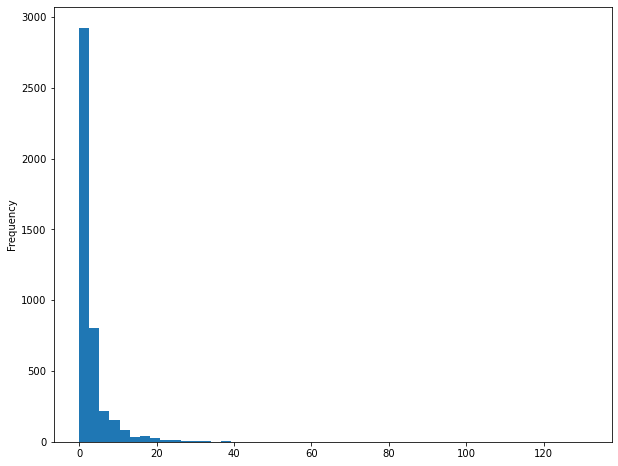

In [31]:
#Create histogram to find out how many customers purchased item only once.
lf_tx_data['frequency'].plot(kind= 'hist', bins = 50, figsize = (10,8));

In [32]:
print('Percentaje de consumidores con una compra ', round((lf_tx_data['frequency'].value_counts(normalize =True)*100),2)[0],'%')

Percentaje de consumidores con una compra  35.7 %


In [33]:
# los 10 porcentajes frecuencia 
(lf_tx_data['frequency'].value_counts(normalize =True)*100).iloc[:10]

0.0    35.699470
1.0    20.142890
2.0    11.546439
3.0     8.942153
4.0     5.254667
5.0     4.240608
6.0     3.042176
7.0     1.982024
8.0     1.544135
9.0     1.106246
Name: frequency, dtype: float64

### Lifetime using BG/NBD Model

In [34]:
from lifetimes import BetaGeoFitter

In [35]:
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(lf_tx_data['frequency'], lf_tx_data['recency'], lf_tx_data['T'])

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 68.89, b: 6.75, r: 0.83>

In [36]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.826433,0.026780,0.773944,0.878922
alpha,68.890678,2.611055,63.773011,74.008345
a,0.003443,0.010347,-0.016837,0.023722
b,6.749363,22.412933,-37.179985,50.678711


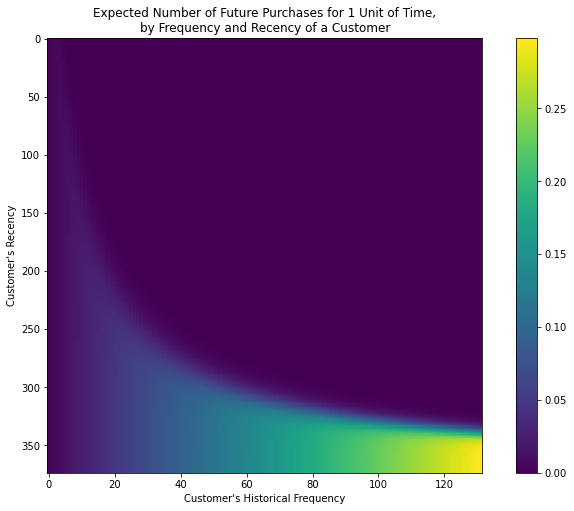

In [37]:
fig = plt.figure(figsize = (12,8))
plot_frequency_recency_matrix(bgf)
plt.show()

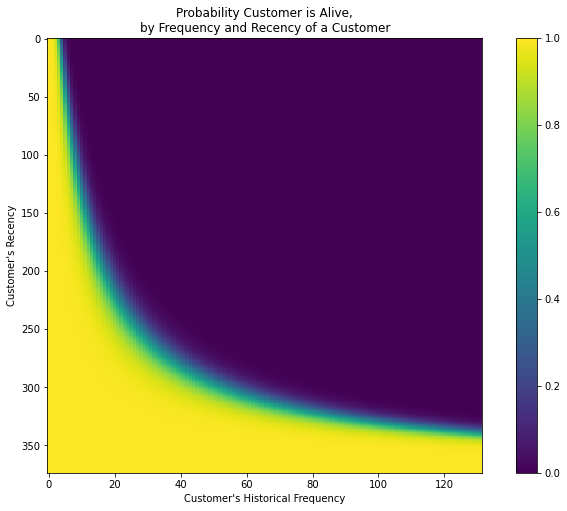

In [38]:
fig = plt.figure(figsize = (12,8))
plot_probability_alive_matrix(bgf)
plt.show()

Podemos ver que si un cliente le ha comprado 125 veces y su última compra fue cuando tenía 350 semanas (dado que la persona tiene 350 semanas), entonces es su mejor cliente (abajo a la derecha). Sus clientes más fríos son los que están en la esquina superior derecha: compraron mucho rápido y no los hemos visto en semanas.

También está esa hermosa "cola" alrededor (50,120). Eso representa al cliente que compra con poca frecuencia, pero lo hemos visto recientemente, por lo que es posible que vuelva a comprar; no estamos seguros de si está muerto o simplemente entre compras

### Predecir transacciones futuras en los próximos 10 días  

Los 10 clientes principales que el modelo espera que realicen compras
en los próximos 10 días, según datos históricos

In [41]:
t = 10, 
lf_tx_data['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t,
                                                                                    lf_tx_data['frequency'],
                                                                                    lf_tx_data['recency'],
                                                                                    lf_tx_data['T']),2)

In [42]:
lf_tx_data.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,CustomerID,frequency,recency,T,monetary_value,pred_num_txn
0,14911.0,131.0,372.0,373.0,1093.661679,2.98
1,12748.0,113.0,373.0,373.0,298.360885,2.58
2,17841.0,111.0,372.0,373.0,364.452162,2.53
3,15311.0,89.0,373.0,373.0,677.729438,2.03
4,14606.0,88.0,372.0,373.0,135.890114,2.01
5,12971.0,70.0,369.0,372.0,159.211286,1.61
6,13089.0,65.0,367.0,369.0,893.714308,1.50
7,14527.0,53.0,367.0,369.0,155.016415,1.23
8,13798.0,52.0,371.0,372.0,706.650962,1.20
9,16422.0,47.0,352.0,369.0,702.472340,1.09


### Evaluación del ajuste del modelo

<Figure size 864x576 with 0 Axes>

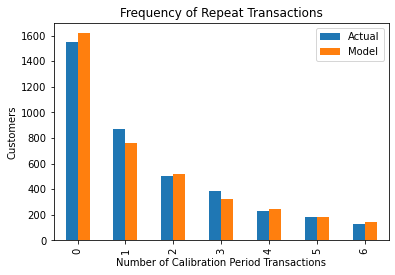

In [43]:
fig = plt.figure(figsize = (12,8))
plot_period_transactions(bgf)
plt.show()

Podemos ver que nuestros datos reales y nuestros datos simulados se alinean bien. Esto prueba que nuestro modelo

####  Predicción de transacciones futuras del cliente para los próximos 10 días


In [56]:
lf_tx_data.head(2)

,frequency,recency,T,monetary_value,pred_num_txn
CustomerID,,,,,
12346.0,0.0,0.0,325.0,0.000000,0.02
12347.0,6.0,365.0,367.0,599.701667,0.16


In [66]:
lf_tx_data.loc[14911]

frequency          131.000000
recency            372.000000
T                  373.000000
monetary_value    1093.661679
pred_num_txn         2.980000
Name: 14911.0, dtype: float64

In [68]:
t = 10
individual =  lf_tx_data.loc[14911]
bgf.predict(t,individual['frequency'], individual['recency'], individual['T'] )

2.9830238639027793

In [69]:
individual2 = lf_tx_data.loc[12346]
bgf.predict(t,individual2['frequency'], individual2['recency'], individual2['T'] )

0.02098103379831142

### Data Correlation

In [70]:
lf_tx_data[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.046161
monetary_value,0.046161,1.000000


### Clientes de Shortlist que tuvieron al menos una compra repetida con la empresa.

In [74]:
shorlisted_customers = lf_tx_data[lf_tx_data['frequency']>0]
print(shorlisted_customers.head().reset_index())
print('---------------------------------------')
print('La cantidad de Clientes es de :', len(shorlisted_customers))

   CustomerID  frequency  recency      T  monetary_value  pred_num_txn
0     12347.0        6.0    365.0  367.0      599.701667          0.16
1     12348.0        3.0    283.0  358.0      301.480000          0.09
2     12352.0        6.0    260.0  296.0      368.256667          0.19
3     12356.0        2.0    303.0  325.0      269.905000          0.07
4     12358.0        1.0    149.0  150.0      683.200000          0.08
---------------------------------------
La cantidad de Clientes es de : 2790


In [75]:
shorlisted_customers.shape[0]

2790

## modelo Gamma-Gamma 

In [76]:
from lifetimes import GammaGammaFitter

In [77]:
ggf = GammaGammaFitter(penalizer_coef=0)
ggf.fit(shorlisted_customers['frequency'], shorlisted_customers['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>

Después de aplicar el modelo Gamma-Gamma, ahora podemos estimar el valor de transacción promedio para cada cliente.

In [80]:
ggf.conditional_expected_average_profit(lf_tx_data['frequency'], lf_tx_data['monetary_value']).head(10)

CustomerID
12346.0    416.917667
12347.0    569.988807
12348.0    333.762672
12349.0    416.917667
12350.0    416.917667
12352.0    376.166864
12353.0    416.917667
12354.0    416.917667
12355.0    416.917667
12356.0    324.008941
dtype: float64

In [81]:
lf_tx_data['pred_tx_value_aveg'] = round(ggf.conditional_expected_average_profit(lf_tx_data['frequency'],
                                                                           lf_tx_data['monetary_value']).head(10),2)

In [82]:
lf_tx_data.head(10).reset_index()

,CustomerID,frequency,recency,T,monetary_value,pred_num_txn,pred_tx_value_aveg
0,12346.0,0.0,0.0,325.0,0.000000,0.02,416.92
1,12347.0,6.0,365.0,367.0,599.701667,0.16,569.99
2,12348.0,3.0,283.0,358.0,301.480000,0.09,333.76
3,12349.0,0.0,0.0,18.0,0.000000,0.10,416.92
4,12350.0,0.0,0.0,310.0,0.000000,0.02,416.92
5,12352.0,6.0,260.0,296.0,368.256667,0.19,376.17
6,12353.0,0.0,0.0,204.0,0.000000,0.03,416.92
7,12354.0,0.0,0.0,232.0,0.000000,0.03,416.92
8,12355.0,0.0,0.0,214.0,0.000000,0.03,416.92
9,12356.0,2.0,303.0,325.0,269.905000,0.07,324.01


### Calcular el valor de por vida del cliente- Customer Lifetime Value(CLV)

In [83]:
# monthly discount rate ~ 12.7% annually
lf_tx_data['CLV'] = ggf.customer_lifetime_value(
bgf, lf_tx_data['frequency'], lf_tx_data['recency'],lf_tx_data['T'], 
lf_tx_data['monetary_value'],
time=12,
discount_rate=0.01)

In [85]:
lf_tx_data.head(2)

,frequency,recency,T,monetary_value,pred_num_txn,pred_tx_value_aveg,CLV
CustomerID,,,,,,,
12346.0,0.0,0.0,325.0,0.000000,0.02,416.92,295.248495
12347.0,6.0,365.0,367.0,599.701667,0.16,569.99,3010.933997


In [87]:
result = lf_tx_data.drop(lf_tx_data.iloc[:, 0:6], axis=1)
result= result.reset_index()

In [90]:
result.sort_values(by='CLV', ascending=False).head(10)

,CustomerID,CLV
1690,14646.0,222128.930290
4202,18102.0,178895.333435
3009,16446.0,175531.468535
3729,17450.0,147476.621010
1290,14096.0,127589.202889
1880,14911.0,109442.132668
55,12415.0,96290.227222
1334,14156.0,89410.334970
3772,17511.0,67660.407580
2703,16029.0,58729.618772
